Artificial Nural Network Implementation 2

In [1]:
!pip install tensorflow-gpu

In [5]:
!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [6]:
!pip cache purge


Files removed: 4


In [2]:
!pip install tensorflow-gpu==2.11.0


In [3]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [5]:
# import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [14]:
# Feature Engineering
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [16]:
# concatinate those variables with data frame
X=X.drop(['Geography','Gender'],axis=1)


In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [19]:
X=pd.concat([X,geography,gender],axis=1)

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [24]:
X_train.shape

(8000, 11)

In [25]:
X_test.shape

(2000, 11)

In [26]:
# Part 2 Now Let's create The ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [27]:
# Lets Initialise the ANN
Classifier=Sequential()

In [29]:
# Adding the input layer
Classifier.add(Dense(units=11,activation='relu'))

In [30]:
# Adding the first hidden layer
Classifier.add(Dense(units=7,activation='relu'))

In [31]:
# adding the second  hidden layer
Classifier.add(Dense(units=6,activation='relu'))

In [32]:
# adding the second  hidden layer
Classifier.add(Dense(units=1,activation='sigmoid'))

In [33]:
Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
# Early stoping
import tensorflow as tf

early_stoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [37]:
model_history=Classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 [==============================] - 10s 6ms/step - loss: 0.4965 - accuracy: 0.7959 - val_loss: 0.4457 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4308 - accuracy: 0.7962 - val_loss: 0.4314 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4148 - accuracy: 0.7962 - val_loss: 0.4172 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.4003 - accuracy: 0.8082 - val_loss: 0.4011 - val_accuracy: 0.8224
Epoch 5/1000
536/536 [==============================] - 6s 11ms/step - loss: 0.3770 - accuracy: 0.8364 - val_loss: 0.3795 - val_accuracy: 0.8395
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3590 - accuracy: 0.8498 - val_loss: 0.3695 - val_accuracy: 0.8516
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3518 - accuracy: 0.8526 - val_loss: 0.3698 - val_accurac

In [39]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

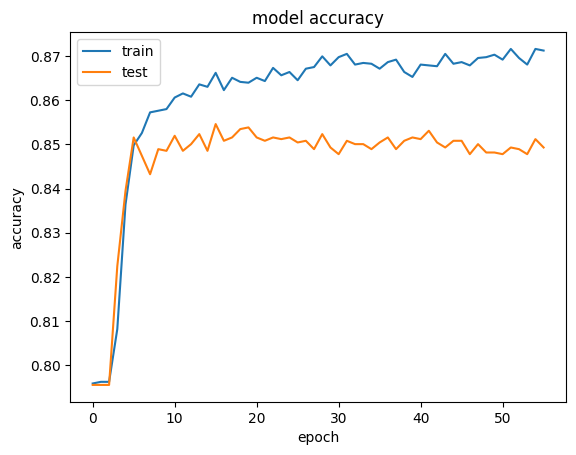

In [40]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

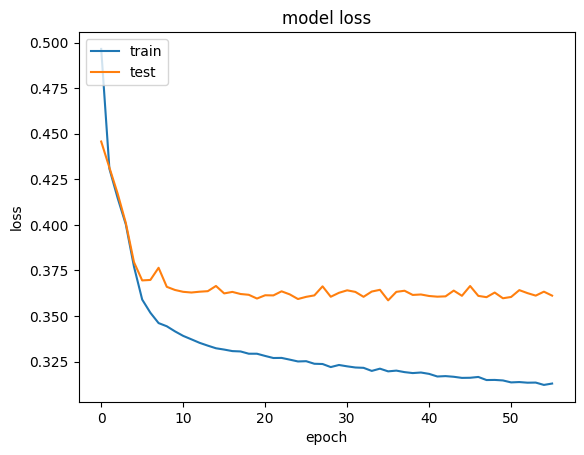

In [41]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
y_pred=Classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [43]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1492,  103],
       [ 191,  214]])

In [44]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [45]:
score

0.853